In [ ]:
# 1 Import the necessary libraries

In [162]:
import pandas as pd
import numpy as np
import seaborn as sns
# set color on Seabon
sns.set(color_codes=True)
import scipy.stats as sts
import copy

In [163]:
# 2 Import and Read the data as a data frame

In [164]:
insu_data = pd.read_csv('insurance.csv')

In [165]:
insu_data

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [166]:
#
# 3.a Shape and size of the data 
#

In [167]:
insu_shape = insu_data.shape
insu_size = insu_data.size

In [168]:
print("Size of data : " , insu_size)
print("Shape of data : ", insu_shape)

Size of data :  9366
Shape of data :  (1338, 7)


In [169]:
#
# 3.b Data type of each attribute
#

In [170]:
insu_data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [171]:
#
# 3.c Checking the presence of missing values
#

In [172]:
# Find any null value is present in data if any value is null it will show true on the row, colum
insu_data.isnull()

age    sex    bmi  children  smoker  region  charges
0     False  False  False     False   False   False    False
1     False  False  False     False   False   False    False
2     False  False  False     False   False   False    False
3     False  False  False     False   False   False    False
4     False  False  False     False   False   False    False
...     ...    ...    ...       ...     ...     ...      ...
1333  False  False  False     False   False   False    False
1334  False  False  False     False   False   False    False
1335  False  False  False     False   False   False    False
1336  False  False  False     False   False   False    False
1337  False  False  False     False   False   False    False

[1338 rows x 7 columns]

In [173]:
#the following summry count shows total 7 colums and num of rows is 1338 where no missing values 
insu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [174]:
# 3.d 5 point summary of numerical attributes 
# By default describe works only with numrical values and as per dtype attributes
# Age, BMI, Children and Charges.

In [175]:
insu_data.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [176]:
# Following Age is to verify above insurance data is describe matching for 5 point summary
insu_age_min = np.min(insu_data['age'])
insu_age_max = np.max(insu_data['age'])
insu_age_per = np.percentile(insu_data['age'], [25, 50, 75])
IQR = insu_age_per[2] - insu_age_per[0]
print('Min Age    : ', insu_age_min)
print('Q1 Age     : ', insu_age_per[0])
print('Median Age : ', insu_age_per[1])
print('Q3 Age     : ', insu_age_per[2])
print('Max Age    : ', insu_age_max)
print('IQR of Age : ', IQR)

Min Age    :  18
Q1 Age     :  27.0
Median Age :  39.0
Q3 Age     :  51.0
Max Age    :  64
IQR of Age :  24.0


In [177]:
# Following BMI is to verify above insurance data is describe matching for 5 point summary
insu_bmi_min = np.min(insu_data['bmi'])
insu_bmi_max = np.max(insu_data['bmi'])
insu_bmi_per = np.percentile(insu_data['bmi'], [25, 50, 75])
IQR = insu_bmi_per[2] - insu_bmi_per[0]
print('Min bmi    : ', insu_bmi_min)
print('Q1 bmi     : ', insu_bmi_per[0])
print('Median bmi : ', insu_bmi_per[1])
print('Q3 bmi     : ', insu_bmi_per[2])
print('Max bmi    : ', insu_bmi_max)
print('IQR of BMI : ', IQR)

Min bmi    :  15.96
Q1 bmi     :  26.29625
Median bmi :  30.4
Q3 bmi     :  34.69375
Max bmi    :  53.13
IQR of BMI :  8.3975


In [178]:
# Following Children is to verify above insurance data is describe matching for 5 point summary
insu_children_min = np.min(insu_data['children'])
insu_children_max = np.max(insu_data['children'])
insu_children_per = np.percentile(insu_data['children'], [25, 50, 75])
IQR = insu_children_per[2] - insu_children_per[0]
print('Min children    : ', insu_children_min)
print('Q1 children     : ', insu_children_per[0])
print('Median children : ', insu_children_per[1])
print('Q3 children     : ', insu_children_per[2])
print('Max children    : ', insu_children_max)
print('IQR of children : ', IQR)

Min children    :  0
Q1 children     :  0.0
Median children :  1.0
Q3 children     :  2.0
Max children    :  5
IQR of children :  2.0


In [179]:
# Following Charges is to verify above insurance data is describe matching for 5 point summary
insu_charges_min = np.min(insu_data['charges'])
insu_charges_max = np.max(insu_data['charges'])
insu_charges_per = np.percentile(insu_data['charges'], [25, 50, 75])
IQR = insu_charges_per[2] - insu_charges_per[0]
print('Min charges    : ', insu_charges_min)
print('Q1 charges     : ', insu_charges_per[0])
print('Median charges : ', insu_charges_per[1])
print('Q3 charges     : ', insu_charges_per[2])
print('Max charges    : ', insu_charges_max)
print('IQR of Charges : ', IQR)

Min charges    :  1121.8739
Q1 charges     :  4740.28715
Median charges :  9382.033
Q3 charges     :  16639.912515
Max charges    :  63770.42801
IQR of Charges :  11899.625365


In [180]:
#
# 3.e Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.
#

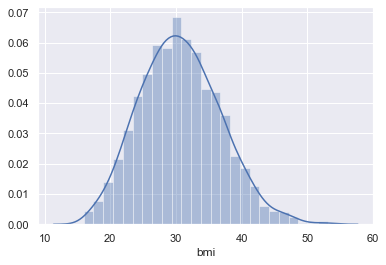

In [181]:
sns.distplot(insu_data['bmi'])

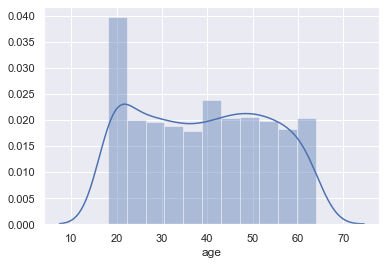

In [182]:
sns.distplot(insu_data['age'])

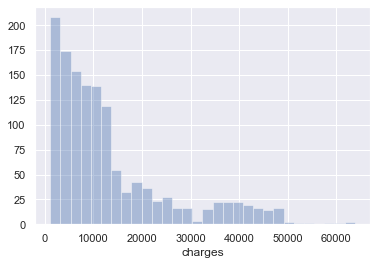

In [185]:
sns.distplot(insu_data['charges'],kde=False);

In [186]:
#
# 3.f Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns
#

In [187]:
insu_data.skew(axis = 0, skipna = True)

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

In [188]:
#
# 3.g Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns
#
# We will use box plot as privious we has capture Quadants the following plot is helpfull to compare outliners

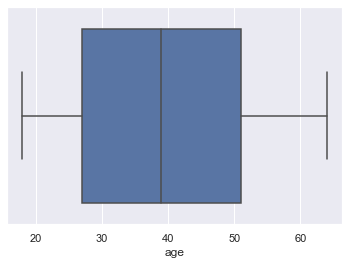

In [189]:
sns.boxplot(x=insu_data['age'])
# The Age dataset not have any outliner

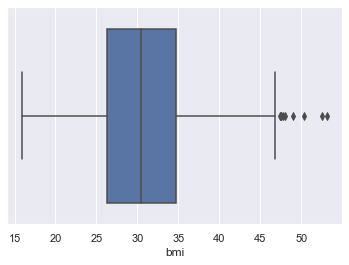

In [190]:
sns.boxplot(x=insu_data['bmi'])
# The BMI dataset have outliner

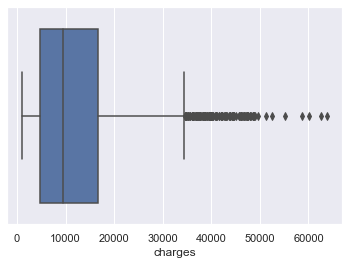

In [191]:
sns.boxplot(x=insu_data['charges'])
# The Charges dataset have outliner

In [192]:
# 3.h Distribution of categorical columns

In [193]:
# People who smoke
smoke_count = pd.DataFrame(insu_data.smoker.value_counts()).T
smoke_count

no  yes
smoker  1064  274

In [194]:
#Fraction on Total Numbers of Record
pd.DataFrame(insu_data.smoker.value_counts(normalize=True))

smoker
no   0.795217
yes  0.204783

In [195]:
# People Based on Region
region_count = pd.DataFrame(insu_data.region.value_counts()).T
region_count

southeast  southwest  northwest  northeast
region        364        325        325        324

In [196]:
#Fraction on Total Numbers of Record
pd.DataFrame(insu_data.region.value_counts(normalize=True))

region
southeast  0.272048
southwest  0.242900
northwest  0.242900
northeast  0.242152

In [197]:
# People who has children
children_count = pd.DataFrame(insu_data.children.value_counts()).T
children_count

0    1    2    3   4   5
children  574  324  240  157  25  18

In [198]:
#Fraction on Total Numbers of Record
pd.DataFrame(insu_data.children.value_counts(normalize=True))

children
0  0.428999
1  0.242152
2  0.179372
3  0.117339
4  0.018685
5  0.013453

In [199]:
# People who has children
sex_count = pd.DataFrame(insu_data.sex.value_counts()).T
sex_count

male  female
sex   676     662

In [200]:
#Fraction on Total Numbers of Record
pd.DataFrame(insu_data.sex.value_counts(normalize=True))

sex
male    0.505232
female  0.494768

In [201]:
#3.i Pair plot that includes all the columns of the data frame

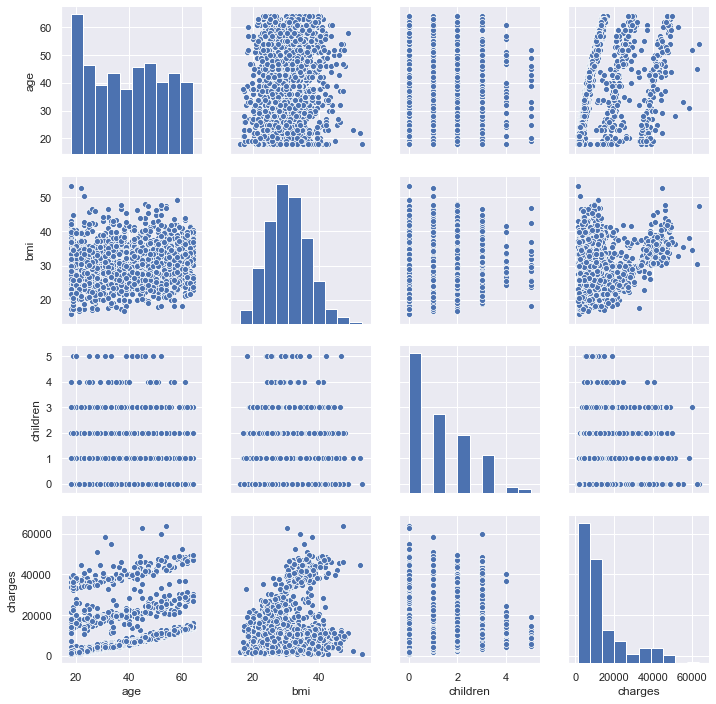

In [202]:
sns.pairplot(insu_data)

In [203]:
#
# 4.a Do charges of people who smoke differ significantly from the people who don't?
#
# There is one Age Factor need to count as charges is depend on Age then Smoker and Non Smoker

In [204]:
smoke_count

no  yes
smoker  1064  274

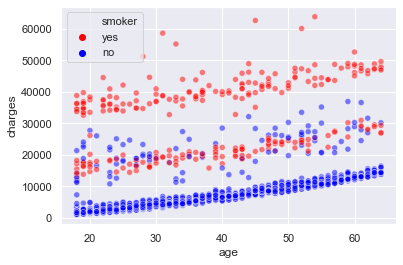

In [205]:
sns.scatterplot(insu_data.age,insu_data.charges,  hue=insu_data.smoker, palette= ['red','blue'] ,alpha=0.5)

In [206]:
#Setting Charges Valu as A for smoker
a = np.array(insu_data[insu_data.smoker == 'yes'].charges)
#Setting Charges Valu as b for non smoker
b = np.array(insu_data[insu_data.smoker == 'no'].charges)

In [207]:
smoker_test = sts.ttest_ind(a,b)
smoker_test

Ttest_indResult(statistic=46.664921172723716, pvalue=8.271435842177219e-283)

In [208]:
# Checking our output with significance level at 5%
smoker_test[1] < 0.05

True

In [209]:
# The Answer is "yes" charges of people who smoke differ significantly from the people who don't.
print('"yes" charges of people who smoke differ significantly from the people who dont')

"yes" charges of people who smoke differ significantly from the people who dont


In [210]:
#
# 4.b Does bmi of males differ significantly from that of females?
# There is one Age Factor need to count from male and female

In [211]:
sex_count

male  female
sex   676     662

In [212]:
#Setting Charges Valu as A for smoker
m = np.array(insu_data[insu_data.sex == 'male'].bmi)
#Setting Charges Valu as b for non smoker
f = np.array(insu_data[insu_data.sex == 'female'].bmi)

In [213]:
bmi_test = sts.ttest_ind(m,f)
bmi_test

Ttest_indResult(statistic=1.696752635752224, pvalue=0.08997637178984932)

In [214]:
# Checking our output with significance level at 5%
bmi_test[1] < 0.05

False

In [215]:
# The Answer is "NO" bmi of males dose not differ significantly from than females.
print('"NO" bmi of males dose not differ significantly from than females')

"NO" bmi of males dose not differ significantly from than females


In [216]:
#
# 4.c Is the proportion of smokers significantly different in different genders?
#

In [217]:
sex_smoke_crosstab = pd.crosstab(insu_data['sex'],insu_data['smoker'])
sex_smoke_crosstab

smoker   no  yes
sex             
female  547  115
male    517  159

In [218]:
sex_smoke_test = sts.chi2_contingency(sex_smoke_crosstab)
sex_smoke_test

(7.39291081459996,
 0.006548143503580696,
 1,
 array([[526.43348281, 135.56651719],
        [537.56651719, 138.43348281]]))

In [219]:
# Checking our output with significance level at 5%
sex_smoke_test[1] < 0.05

True

In [220]:
# The Answer is "Yes" the proportion of smokers significantly different in different genders.
print('"Yes" the proportion of smokers significantly different in different genders')

"Yes" the proportion of smokers significantly different in different genders


In [221]:
#
# 4.d Is the distribution of bmi across women with no children, one child and two children, the same?
#

In [222]:
#Create Copy Data with Females from Insurance dataset
female_tbl = copy.deepcopy(insu_data[insu_data['sex'] == 'female'])
female_tbl

age     sex    bmi  children smoker     region      charges
0      19  female  27.90         0    yes  southwest  16884.92400
5      31  female  25.74         0     no  southeast   3756.62160
6      46  female  33.44         1     no  southeast   8240.58960
7      37  female  27.74         3     no  northwest   7281.50560
9      60  female  25.84         0     no  northwest  28923.13692
...   ...     ...    ...       ...    ...        ...          ...
1332   52  female  44.70         3     no  southwest  11411.68500
1334   18  female  31.92         0     no  northeast   2205.98080
1335   18  female  36.85         0     no  southeast   1629.83350
1336   21  female  25.80         0     no  southwest   2007.94500
1337   61  female  29.07         0    yes  northwest  29141.36030

[662 rows x 7 columns]

In [223]:
#Verifying output count
sex_count.female

sex    662
Name: female, dtype: int64

In [224]:
#Setting children count with BMI
no_child = insu_data[insu_data.children == 0]['bmi']
one_child = insu_data[insu_data.children == 1]['bmi']
two_child = insu_data[insu_data.children == 2]['bmi']

In [225]:
child_bmi = sts.f_oneway(no_child, one_child, two_child)
child_bmi

F_onewayResult(statistic=0.4169829280345703, pvalue=0.6591330886467935)

In [226]:
# Checking our output with significance level at 5%
child_bmi[1] < 0.05

False

In [227]:
# The Answer is "NO" bmi across women with no children, one child and two children no effect.
print('"NO" bmi across women with no children, one child and two children no effect.')

"NO" bmi across women with no children, one child and two children no effect.
